## Scaling and transformations
Now before proceeding to building the models I'm going to do the X/y split and scale/transform the data

In [34]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/cleaned/6.jobs_in_data.csv')
df.head()

,work_year,job_title,job_category,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,salary_in_euros,cost_of_living,purchasing_power,job_field
0,2023,Data DevOps Engineer,Data Engineering,Germany,2,4,2,Germany,3,87411,127.47,685.74,Data Engineering
1,2023,Data Architect,Data Architecture and Modeling,United States,3,4,3,United States,2,171120,143.34,1193.80,Data Engineering
2,2023,Data Architect,Data Architecture and Modeling,United States,3,4,3,United States,2,75256,143.34,525.02,Data Engineering
3,2023,Data Scientist,Data Science and Research,United States,3,4,3,United States,2,195040,143.34,1360.68,Data Science
4,2023,Data Scientist,Data Science and Research,United States,3,4,3,United States,2,85836,143.34,598.83,Data Science


## X/y Split
The target will be "salary_in_euros". I also want to drop the columns 'job_title' and 'job_category' because they are redundant for creating the model since I already added the column 'job_field' before with the categories that I want to work with.

In [3]:
df['job_category'].value_counts()

job_category
Data Science and Research         1651
Data Engineering                  1157
Machine Learning and AI            914
Data Analysis                      808
Leadership and Management          351
BI and Visualization               188
Data Architecture and Modeling     162
Data Management and Strategy        49
Data Quality and Operations         45
Cloud and Database                   5
Name: count, dtype: int64

In [4]:
X = df.drop(columns=['work_year', 'salary_in_euros', 'job_title', 'job_category', 'purchasing_power'], axis=1)
y = df['salary_in_euros']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(4264, 8)

(1066, 8)

(4264,)

(1066,)

## Dividing X into numerical and categorical

In [7]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [8]:
X_train_num.head()

,experience_level,employment_type,work_setting,company_size,cost_of_living
2804,3,4,3,2,143.34
3858,3,4,3,2,143.34
511,2,4,3,2,143.34
62,3,4,3,2,143.34
3034,3,4,1,2,143.34


In [9]:
X_test_num.head()

,experience_level,employment_type,work_setting,company_size,cost_of_living
1323,3,4,3,2,143.34
1839,3,4,3,2,143.34
798,3,4,1,2,143.34
3856,4,4,3,2,143.34
4553,3,4,3,2,106.46


In [10]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
experience_level,4264.0,2.656895,0.678589,1.00,2.00,3.00,3.00,4.00
employment_type,4264.0,3.984522,0.183138,1.00,4.00,4.00,4.00,4.00
work_setting,4264.0,2.115385,0.975808,1.00,1.00,3.00,3.00,3.00
company_size,4264.0,2.065197,0.345160,1.00,2.00,2.00,2.00,3.00
cost_of_living,4264.0,139.699977,15.292912,27.37,143.34,143.34,143.34,197.89


In [11]:
from sklearn.preprocessing import PowerTransformer
import pickle

transformer = PowerTransformer(method="box-cox")
transformer.fit(X_train_num)

path = "../ml/transformers/"
scaler_file_name = "power_transformer_x.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(transformer, file)

X_train_num_transformed = transformer.transform(X_train_num)
X_test_num_transformed = transformer.transform(X_test_num)

In [12]:
import sklearn as sk
sk.__version__
# pip install scikit-learn=1.3.2

'1.3.2'

## Scaling numerical features
Since the numerical features have very different ranges I'm going to use the Standard Scaler.

In [13]:
# from sklearn.preprocessing import MinMaxScaler
# import pickle

# scaler = MinMaxScaler()
# scaler.fit(X_train_num)

# path = "../ml/scalers/"
# scaler_file_name = "MinMaxScaler.pkl"

# with open(path + scaler_file_name, "wb") as file:
#     pickle.dump(scaler, file)

# X_train_num_transformed = scaler.transform(X_train_num)
# X_test_num_transformed = scaler.transform(X_test_num)

In [14]:
# from sklearn.preprocessing import StandardScaler
# import pickle

# scaler = StandardScaler()
# scaler.fit(X_train_num)

# path = "../ml/scalers/"
# scaler_file_name = "standard_scaler.pkl"

# with open(path + scaler_file_name, "wb") as file:
#     pickle.dump(scaler, file)

# X_train_num_transformed = scaler.transform(X_train_num)
# X_test_num_transformed = scaler.transform(X_test_num)

In [15]:
X_train_num_transformed_df = pd.DataFrame(X_train_num_transformed, columns=X_train_num.columns , index=X_train_num.index)
X_test_num_transformed_df = pd.DataFrame(X_test_num_transformed, columns=X_test_num.columns , index=X_test_num.index)

In [16]:
X_test_num_transformed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
experience_level,1066.0,-0.026126,0.985937,-2.006441,-1.081013,0.455461,0.455461,2.601017
employment_type,1066.0,0.010253,0.943698,-10.837179,0.092275,0.092275,0.092275,0.092275
work_setting,1066.0,0.060666,0.990732,-1.146402,-1.146402,0.903891,0.903891,0.903891
company_size,1066.0,-0.029680,0.974230,-3.589388,-0.153302,-0.153302,-0.153302,2.532658
cost_of_living,1066.0,0.039298,1.138993,-3.508375,0.197551,0.197551,0.197551,17.452503


In [17]:
X_train_num_transformed_df.head()

,experience_level,employment_type,work_setting,company_size,cost_of_living
2804,0.455461,0.092275,0.903891,-0.153302,0.197551
3858,0.455461,0.092275,0.903891,-0.153302,0.197551
511,-1.081013,0.092275,0.903891,-0.153302,0.197551
62,0.455461,0.092275,0.903891,-0.153302,0.197551
3034,0.455461,0.092275,-1.146402,-0.153302,0.197551


In [18]:
X_test_num_transformed_df.head()

,experience_level,employment_type,work_setting,company_size,cost_of_living
1323,0.455461,0.092275,0.903891,-0.153302,0.197551
1839,0.455461,0.092275,0.903891,-0.153302,0.197551
798,0.455461,0.092275,-1.146402,-0.153302,0.197551
3856,2.601017,0.092275,0.903891,-0.153302,0.197551
4553,0.455461,0.092275,0.903891,-0.153302,-2.760644


## Encoding categorical features

In [19]:
X_train_cat.head()

,employee_residence,company_location,job_field
2804,United States,United States,Data Engineering
3858,United States,United States,Data Science
511,United States,United States,Data Analysis
62,United States,United States,Data Science
3034,United States,United States,Data Science


In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(X_train_cat)

path = "../ml/encoders/"
encoder_file_name = "one_hot_encoder.pkl"

with open(path + encoder_file_name, "wb") as file:
    pickle.dump(encoder, file)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()

In [21]:
encoded_feature_names = encoder.get_feature_names_out(X_train_cat.columns)

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=encoded_feature_names, index=X_train_cat.index)
X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded, columns=encoded_feature_names, index=X_test_cat.index)

In [22]:
X_train_cat_encoded_df.head()

,employee_residence_Algeria,employee_residence_Argentina,employee_residence_Armenia,employee_residence_Australia,employee_residence_Austria,employee_residence_Belgium,employee_residence_Bolivia,employee_residence_Bosnia and Herzegovina,employee_residence_Brazil,employee_residence_Canada,...,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
2804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [23]:
X_test_cat_encoded_df.head()

,employee_residence_Algeria,employee_residence_Argentina,employee_residence_Armenia,employee_residence_Australia,employee_residence_Austria,employee_residence_Belgium,employee_residence_Bolivia,employee_residence_Bosnia and Herzegovina,employee_residence_Brazil,employee_residence_Canada,...,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
X_train_concat = pd.concat([X_train_num_transformed_df, X_train_cat_encoded_df], axis=1)
X_train_concat

,experience_level,employment_type,work_setting,company_size,cost_of_living,employee_residence_Algeria,employee_residence_Argentina,employee_residence_Armenia,employee_residence_Australia,employee_residence_Austria,...,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
2804,0.455461,0.092275,0.903891,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3858,0.455461,0.092275,0.903891,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
511,-1.081013,0.092275,0.903891,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
62,0.455461,0.092275,0.903891,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3034,0.455461,0.092275,-1.146402,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,0.455461,0.092275,0.903891,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3772,0.455461,0.092275,-1.146402,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5191,0.455461,0.092275,-1.146402,-3.589388,-2.830542,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5226,-2.006441,0.092275,-0.035716,2.532658,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
X_test_concat = pd.concat([X_test_num_transformed_df, X_test_cat_encoded_df], axis=1)
X_test_concat

,experience_level,employment_type,work_setting,company_size,cost_of_living,employee_residence_Algeria,employee_residence_Argentina,employee_residence_Armenia,employee_residence_Australia,employee_residence_Austria,...,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,job_field_Data Analysis,job_field_Data Engineering,job_field_Data Science,job_field_Other
1323,0.455461,0.092275,0.903891,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1839,0.455461,0.092275,0.903891,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
798,0.455461,0.092275,-1.146402,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3856,2.601017,0.092275,0.903891,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4553,0.455461,0.092275,0.903891,-0.153302,-2.760644,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,-1.081013,0.092275,-1.146402,2.532658,-3.494315,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5208,-1.081013,0.092275,0.903891,2.532658,-2.587711,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1965,0.455461,0.092275,-1.146402,-0.153302,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4538,-1.081013,0.092275,-1.146402,2.532658,0.197551,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_concat)

path = "../ml/scalers/"
scaler_file_name = "MinMaxScaler_concat.pkl"

with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

X_train_concat_transformed = scaler.transform(X_train_concat)
X_test_concat_transformed = scaler.transform(X_test_concat)

X_train_concat_transformed_df = pd.DataFrame(X_train_concat_transformed, columns=X_train_concat.columns , index=X_train_concat.index)
X_test_concat_transformed_df = pd.DataFrame(X_test_concat_transformed, columns=X_test_concat.columns , index=X_test_concat.index)

In [27]:
X_train_concat_transformed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
experience_level,4264.0,0.435477,0.217065,0.0,0.200854,0.534330,0.534330,1.0
employment_type,4264.0,0.991557,0.091507,0.0,1.000000,1.000000,1.000000,1.0
work_setting,4264.0,0.559140,0.487792,0.0,0.000000,1.000000,1.000000,1.0
company_size,4264.0,0.586305,0.163363,0.0,0.561264,0.561264,0.561264,1.0
cost_of_living,4264.0,0.167471,0.047708,0.0,0.176895,0.176895,0.176895,1.0
...,...,...,...,...,...,...,...,...
company_location_United States,4264.0,0.806051,0.395436,0.0,1.000000,1.000000,1.000000,1.0
job_field_Data Analysis,4264.0,0.193480,0.395072,0.0,0.000000,0.000000,0.000000,1.0
job_field_Data Engineering,4264.0,0.302767,0.459509,0.0,0.000000,0.000000,1.000000,1.0
job_field_Data Science,4264.0,0.484287,0.499812,0.0,0.000000,0.000000,1.000000,1.0


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

model1 = DecisionTreeRegressor()
model2 = LinearRegression()
model3 = KNeighborsRegressor()
model4 = RandomForestRegressor()
model5 = Lasso()
model6 = Ridge()
model7 = GradientBoostingRegressor()
model8 = AdaBoostRegressor()
model9 = ElasticNet()
model10 = SVR()
model11 = ExtraTreesRegressor()

model_pipeline = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11]
model_names = [
    'Decision Tree Regressor', 
    'Linear Regression',
    'KNN', 
    'RandomForestRegressor',
    'Lasso',
    'Ridge',
    'GradientBoostingRegressor',
    'AdaBoostRegressor',
    'ElasticNet',
    'SVR',
    'ExtraTreesRegressor'
]

# scores = {}

# for model, model_name in zip(model_pipeline, model_names):
#     mean_score = np.mean(cross_val_score(model, X_train_concat_transformed_df, y_train, cv=10)).round(2)
#     scores[model_name] = mean_score
# print(scores)

In [35]:
# pt = PowerTransformer()
# pt.fit(y_train)
# y_train_trans = pt.transform(y_train)
# y_test_trans = pt.transform(y_test)
# save with with pickle: "power_transformer_y.pkl"
# gb_reg.fit(X_train_concat, y_train_trans)
# y_train_trans_pred = gb_reg.predict(X_train_concat)
# y_train_pred = pt.inverse_transform(y_train_trains_pred)
# y_test_pred = pt.inverse_transform(y_test_trains_pred)

#model
pt = PowerTransformer()

#fit transformer
y_train_2d = y_train.values.reshape(-1, 1)
y_test_2d = y_test.values.reshape(-1, 1)

pt.fit(y_train_2d)

#transform
y_train_trans = pt.transform(y_train_2d)
y_test_trans = pt.transform(y_test_2d)

#pickle
path = "../ml/transformers//"
transformer_file_name = "power_transformer_y.pkl"
with open(path + transformer_file_name, "wb") as file:
    pickle.dump(pt, file)

#fitting the model
model7.fit(X_train_concat_transformed_df, y_train_trans)

#predictions on train set
y_train_trans_pred = model7.predict(X_train_concat_transformed_df)

#predictions on test set
y_test_trans_pred = model7.predict(X_test_concat_transformed_df)

#score on the train set
print(round(model7.score(X_train_concat_transformed_df, y_train_trans), 2))

#score on the test set
print(round(model7.score(X_test_concat_transformed_df, y_test_trans), 2))

y_train_2d = y_train_trans_pred.reshape(-1, 1)
y_test_2d = y_test_trans_pred.reshape(-1, 1)

y_train_pred_array = pt.inverse_transform(y_train_2d).ravel()
y_test_pred_array = pt.inverse_transform(y_test_2d).ravel()

y_train_pred=pd.Series(y_train_pred)
y_test_pred=pd.Series(y_test_pred)

y_train_pred

0.43
0.44


0       143318.292699
1       167755.164020
2        98026.630767
3       167755.164020
4       164534.077302
            ...      
4259    167755.164020
4260    164534.077302
4261     90762.537412
4262    107852.372839
4263    143318.292699
Length: 4264, dtype: float64

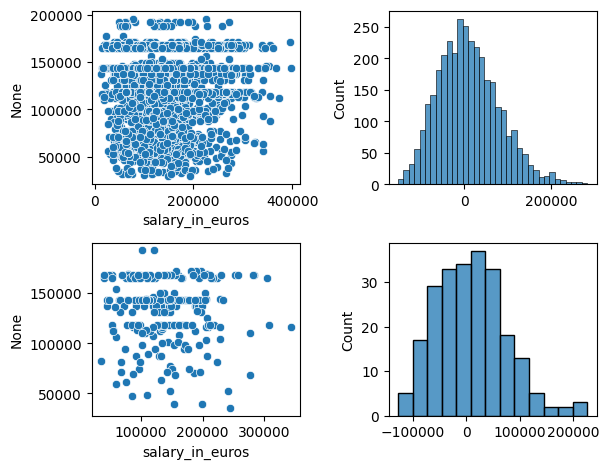

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(2,2)
sns.scatterplot(x=y_train, y=y_train_pred, ax=ax[0,0])
sns.histplot(y_train - y_train_pred, ax=ax[0,1])
sns.scatterplot(x=y_test, y=y_test_pred, ax=ax[1,0])
sns.histplot(y_test - y_test_pred, ax=ax[1,1])
plt.tight_layout()
plt.show()

In [36]:
scores = {}

for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X_train_concat_transformed_df, y_train_trans, cv=5)).round(2)
    scores[model_name] = mean_score
print(scores)

{'Decision Tree Regressor': 0.34, 'Linear Regression': -1.3467458673016986e+24, 'KNN': 0.25, 'RandomForestRegressor': 0.38, 'Lasso': -0.0, 'Ridge': 0.39, 'GradientBoostingRegressor': 0.4, 'AdaBoostRegressor': 0.31, 'ElasticNet': -0.0, 'SVR': 0.4, 'ExtraTreesRegressor': 0.36}
